In [1]:
# import the required libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import DenseNet121

In [2]:
# Global Variable for later use

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [4]:
# There are 7541 Images in our Dataset belonging to different diseases like Bacterial Pneumonia, Covid-19, TB and Viral Pneumonia

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./datasets-4",
    seed=123, # this will ensure we get the same images each time
    shuffle=True, # images inside the batches will be shuffled
    image_size=(IMAGE_SIZE,IMAGE_SIZE), # every image will be of 128x128 dimension
    batch_size=BATCH_SIZE # There will be 64 images in each batch
)

Found 2814 files belonging to 4 classes.


2023-05-18 17:24:24.825577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 17:24:24.889227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 17:24:24.889605: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 17:24:24.893147: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
# The Images belong to the following Class Labels

class_names = dataset.class_names
class_names

['Covid', 'Normal', 'TB', 'Viral_Pneumonia']

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(f"Image: {image_batch.shape}")
    print(f"Labels: {labels_batch.shape}")

Image: (32, 256, 256, 3)
Labels: (32,)


## Visualization

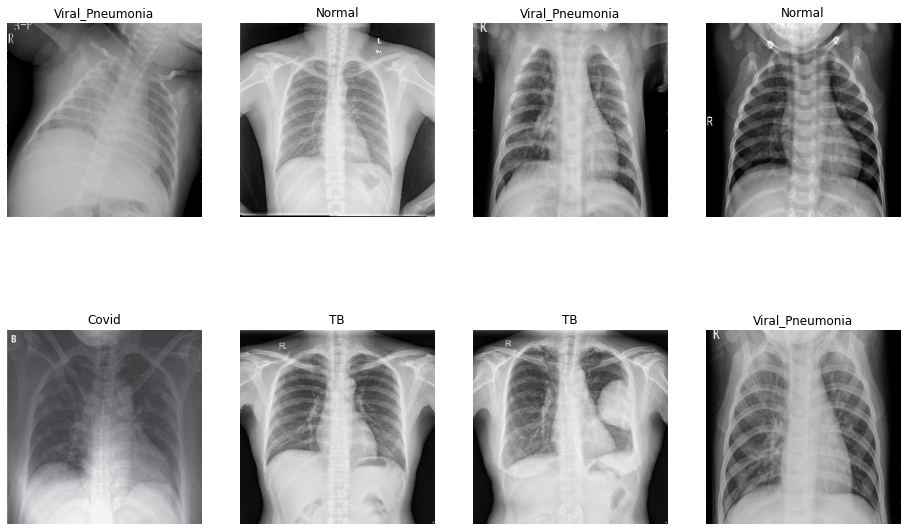

In [7]:
plt.figure(figsize=(16, 16))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(3, 4, i + 1)
        plt.axis('off')
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])